In [1]:
from GEVnonstat_v2.Automatic_GEV_fit import GEVnonstat
#from GEVnonstat_v3.Automatic_GEV_fit_v3_LBFGSB import GEVnonstat
import pandas as pd
import numpy as np
import dill
import os

In [2]:
filename = 'daily_Hs_SS.pkl'
if os.path.exists(filename):
    dill.load_session(filename)

In [3]:
data = pd.read_table("Datos\\Hs_SS_PCs_Cantabria.txt")

In [4]:
# Columns for the Hs dataframe
cols_first = ['yyyy', 'mm', 'dd', 'Hs'] + [col for col in data.columns if col.startswith('PC') and not col.endswith('_SS')]

# Columns for the Surge dataframe
cols_second = ['yyyy', 'mm', 'dd', 'Surge'] + [col for col in data.columns if col.endswith('_SS')]

# Create the two DataFrames
df_hs = data[cols_first]
df_surge = data[cols_second]

In [6]:
days_in_month = {1: 31, 2: 28.25, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
df_hs.loc[:, 'time'] = (
    df_hs['yyyy'] - np.min(df_hs['yyyy'])
    + (df_hs['mm'] - 1) / 12
    + df_hs['dd'] / df_hs['mm'].map(days_in_month) / 12
)

df_surge.loc[:, 'time'] = (
    df_surge['yyyy'] - np.min(df_surge['yyyy'])
    + (df_surge['mm'] - 1) / 12
    + df_surge['dd'] / df_surge['mm'].map(days_in_month) / 12
)

In [8]:
Hsdata = df_hs.drop(columns=["yyyy", "mm", "dd"])
Surgedata = df_surge.drop(columns=["yyyy", "mm", "dd"])

# Fitting daily Hs

In [9]:
hsmax = Hsdata.to_numpy()[:,0]
time = Hsdata.to_numpy()[:,-1]
covariates = {col: Hsdata[col] for col in Hsdata.columns[1:-1]}

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
autogev_hs = GEVnonstat(xt=hsmax,t=time,kt=None,covariates=covariates,example="Hs Daily",trends=False, harm=False)
beta0,beta,alpha0,alpha,gamma0,gamma,betaT,auxvarphi_loc,list_loc,betaT2,auxvarphi_sc,list_sc,loglikeobj,grad,hessian,popt,stdpara = autogev_hs.AutoAdjust()

Stationary GEV AIC: 39746.5713826633 

Starting the Covariates iterative process


Covariate Iteration: 100%|██████████| 200/200 [4:10:46<00:00, 75.23s/it]   


End of the Covariates iterative process
Covariates AIC: 13458.537139388185 



The optimal parameters are in the below table, where the location, scale and shape parameters are defiend as:
$$
\begin{align*}
\mu_t &= \beta_{0} + \beta_{0}^{co} PC_{0} + \beta_{1}^{co} PC_{1} + \dots + \beta_{99}^{co} PC_{99} \\
\psi_t &= \alpha_{0} + \alpha_{0}^{co} PC_{0} + \alpha_{1}^{co} PC_{1} + \dots + \alpha_{99}^{co} PC_{99} \\
\xi_t &= \gamma_{0} %+ \beta_{0}^{co} PC_{0} + \beta_{1}^{co} PC_{1} + \dots + \beta_{99}^{co} PC_{99} 
\end{align*}
$$

In [49]:
complete_varphi = np.zeros(100)
complete_varphi2 = np.zeros(100)
complete_varphi[list_loc] = auxvarphi_loc
complete_varphi2[list_sc] = auxvarphi_sc
cov_dict = {
    "Parameter": ["Location (mu)", "Scale (psi)","Shape (xi)"],
    "Intercept": [beta0, alpha0, gamma0]
    }
for i in range(100):
    name = f"PC{i}"
    cov_dict[name] = [complete_varphi[i], complete_varphi2[i], 0.0]
result_df = pd.DataFrame(cov_dict)
result_df = result_df.replace({0: "--", None: "--", np.nan: "--"})
print(result_df.to_string(index=False))

    Parameter Intercept       PC0       PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16      PC17     PC18      PC19      PC20      PC21      PC22      PC23      PC24      PC25      PC26      PC27      PC28      PC29      PC30      PC31      PC32 PC33      PC34      PC35      PC36      PC37      PC38      PC39      PC40      PC41      PC42      PC43      PC44 PC45      PC46      PC47      PC48      PC49      PC50      PC51     PC52 PC53      PC54      PC55      PC56      PC57      PC58      PC59      PC60      PC61      PC62      PC63      PC64      PC65     PC66      PC67 PC68      PC69      PC70      PC71      PC72      PC73      PC74      PC75 PC76 PC77      PC78 PC79      PC80      PC81      PC82      PC83      PC84      PC85      PC86      PC87    PC88      PC89      PC90 PC91      PC92      PC93      PC94      PC95 PC96      PC97      PC98      PC99
Location (mu)  1.820302  0

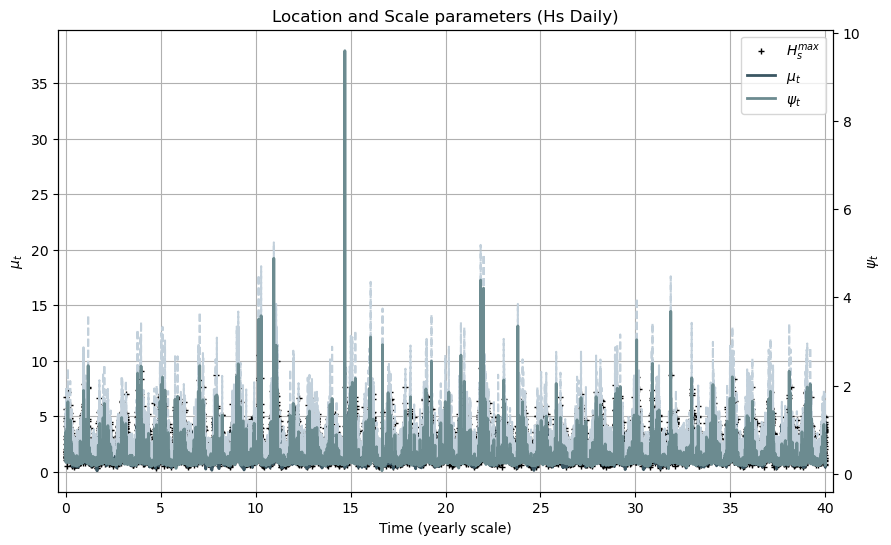

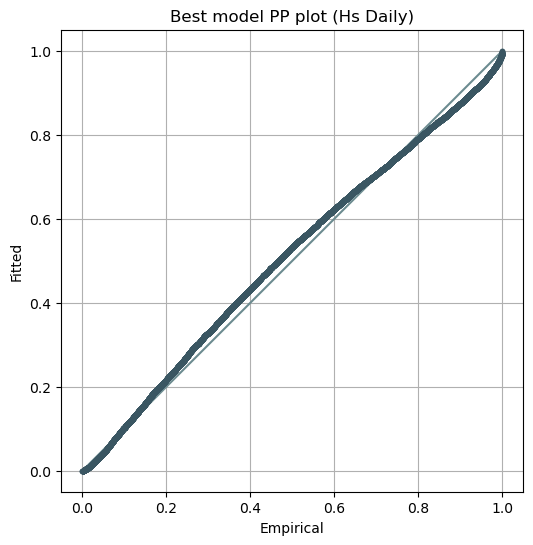

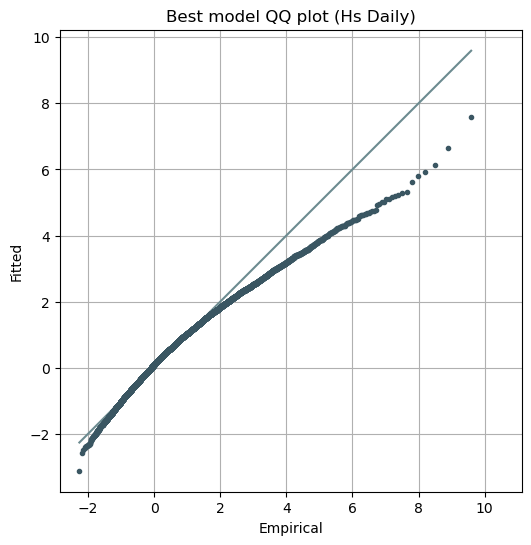

In [39]:
autogev_hs.plot()

# Fitting daily Surge Storm data

In [50]:
ssdaily = Surgedata.to_numpy()[:,0]
time_surge = Surgedata.to_numpy()[:,-1]
covariates_surge = {col: Surgedata[col] for col in Surgedata.columns[1:-1]}

In [51]:
autogev_ss = GEVnonstat(xt=ssdaily,t=time_surge,kt=None,covariates=covariates_surge,example="SS Daily",trends=False, harm=False)
beta0,beta,alpha0,alpha,gamma0,gamma,betaT,auxvarphi_loc,list_loc,betaT2,auxvarphi_sc,list_sc,loglikeobj,grad,hessian,popt,stdpara = autogev_ss.AutoAdjust()

Stationary GEV AIC: -29095.151437802902 

Starting the Covariates iterative process


Covariate Iteration:  49%|████▊     | 73/150 [2:57:56<3:07:41, 146.26s/it]


KeyboardInterrupt: 

In [ ]:
print("beta0",beta0)
print("beta",beta)
print("alpha0",alpha0)
print("alpha",alpha)
print("gamma0",gamma0)
print("gamma",gamma)
print("betaT",betaT)
print("varphi",auxvarphi_loc)
print("betaT2",betaT2)
print("varphi2",auxvarphi_sc)

beta0 -0.014967850018758598
beta None
alpha0 -4.154238503369953
alpha None
gamma0 -0.19542082678402606
gamma None
betaT 7.464639639421018e-05
varphi [ 0.01150222 -0.00814175  0.01078991  0.00085225  0.00548978 -0.00072003
  0.00289617 -0.00403203 -0.00546165  0.00548378  0.00682922  0.00440179
  0.00237051 -0.00299938 -0.0143411  -0.00585954  0.01953332  0.00478017
  0.00660709 -0.00987301 -0.01347422 -0.01062245  0.01363853  0.01170444
 -0.03778693  0.04686335 -0.02810009 -0.05151582 -0.02620081 -0.02978514
  0.03716744  0.06421186 -0.07237343  0.07842767  0.08646544 -0.18655785]
betaT2 None
varphi2 [ 0.0094628   0.00727929  0.04113689  0.05304999  0.07068661 -0.09377495
 -0.89156366 -0.89156366]


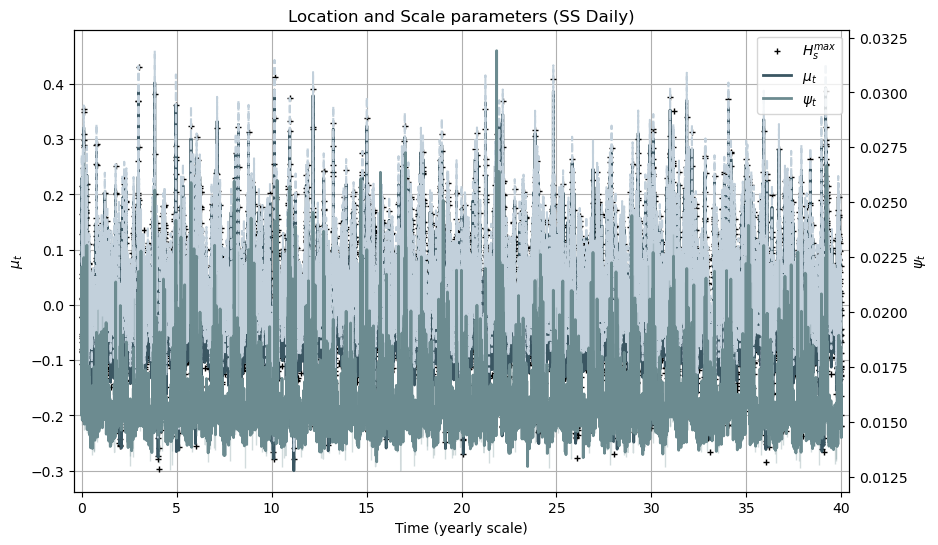

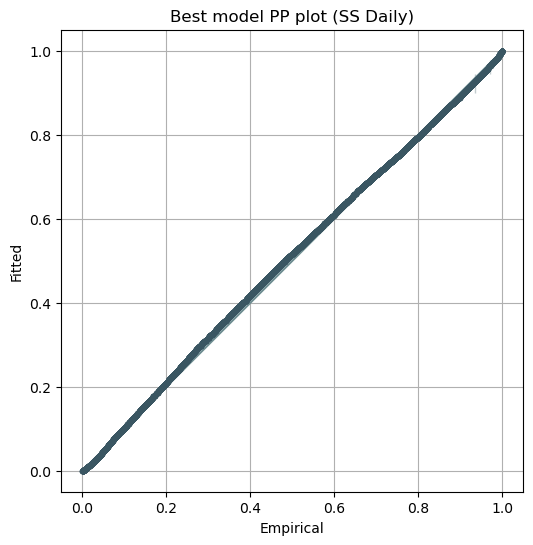

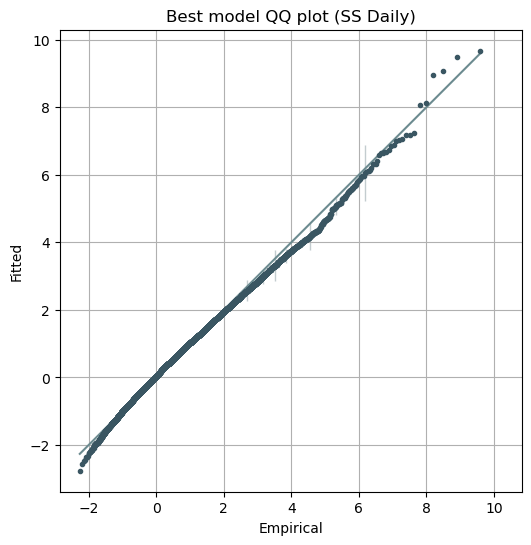

In [ ]:
autogev_ss.plot()

In [ ]:
filename = 'daily_Hs_SS.pkl'
dill.dump_session(filename)